In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
ls data

crop/
data_10000_norm.npz
data_100_100_norm.npy
data_pca_50_y_mean.pickle.npz
dataframe_images_100x100.pickle
dataset/
dog.jpg
fb.jpg
male_01.png
opencv_haarcascade_frontalface_default.xml at master · opencv_opencv.html
opencv_haarcascade_frontalface_default.xml at master · opencv_opencv_files/
pca_50.pickle
wiki_crop/


In [3]:
data = np.load('./data/data_pca_50_y_mean.pickle.npz')
data.files

['arr_0', 'arr_1', 'arr_2']

In [4]:
X = data['arr_0']  
y = data['arr_1']
mean = data['arr_2']

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y , test_size=0.2, stratify = y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1466, 50), (367, 50), (1466,), (367,))

# Training a Machine Learning Model

In [6]:
from sklearn.svm import SVC

In [7]:
model = SVC(C=1.0,kernel = 'rbf', gamma = 0.01, probability = True)

In [8]:
model.fit(x_train,y_train)
print("model trained successfully")

model trained successfully


In [9]:
model.score(x_train, y_train)

0.8901773533424284

In [10]:
model.score(x_test, y_test)

0.7874659400544959

# Model Evaluation
- Confusion Matrix
- Classification Report
- Kappa Score
- ROC and AUC (probability)

In [11]:
from sklearn import metrics


In [12]:
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)

In [13]:
cm = metrics.confusion_matrix(y_test, y_pred)

cm = np.concatenate((cm,cm.sum(axis=0).reshape(1,-1)), axis=0)

cm = np.concatenate((cm,cm.sum(axis=1).reshape(-1,1)), axis=1)
cm

array([[ 98,  46, 144],
       [ 32, 191, 223],
       [130, 237, 367]])

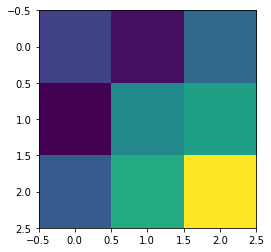

In [14]:
plt.imshow(cm)

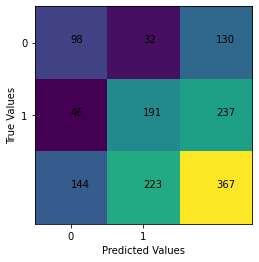

In [15]:
plt.imshow(cm)
for i in range(3):
    for j in range(3):
        plt.text(i,j,'%d'%cm[i,j])
    
plt.xticks([0,1])
plt.yticks([0,1])
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

In [16]:
# Classification report
cr = metrics.classification_report(y_test, y_pred, target_names=['male','female'], output_dict = True)

In [17]:
cr

{'male': {'precision': 0.7538461538461538,
  'recall': 0.6805555555555556,
  'f1-score': 0.7153284671532848,
  'support': 144},
 'female': {'precision': 0.8059071729957806,
  'recall': 0.8565022421524664,
  'f1-score': 0.8304347826086956,
  'support': 223},
 'accuracy': 0.7874659400544959,
 'macro avg': {'precision': 0.7798766634209673,
  'recall': 0.768528898854011,
  'f1-score': 0.7728816248809902,
  'support': 367},
 'weighted avg': {'precision': 0.7854799611223575,
  'recall': 0.7874659400544959,
  'f1-score': 0.7852704517488068,
  'support': 367}}

In [18]:
pd.DataFrame(cr).T

,precision,recall,f1-score,support
male,0.753846,0.680556,0.715328,144.000000
female,0.805907,0.856502,0.830435,223.000000
accuracy,0.787466,0.787466,0.787466,0.787466
macro avg,0.779877,0.768529,0.772882,367.000000
weighted avg,0.785480,0.787466,0.785270,367.000000


In [19]:
# Kappa
metrics.cohen_kappa_score(y_test, y_pred)

0.5464685192813461

# ROC and AUC

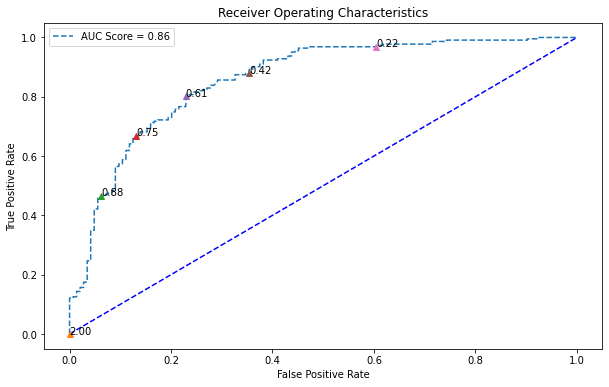

In [20]:
# roc for female
fpr, tpr, thresh = metrics.roc_curve(y_test, y_prob[:,1])
auc_s = metrics.auc(fpr,tpr)

plt.figure(figsize=(10,6))

plt.plot(fpr,tpr,'--')
plt.plot([0,1],[0,1],'b--')

for i in range(0, len(thresh), 20):
    plt.plot(fpr[i],tpr[i],'^')
    plt.text(fpr[i], tpr[i],"%0.2f"%thresh[i])
    
plt.legend(["AUC Score = %0.2f"%auc_s])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.show()

# Hyper Parameter Tuning

In [21]:
model_tune = SVC()

In [22]:
from sklearn.model_selection import GridSearchCV

In [86]:
  
# defining parameter range
param_grid = {'C': [1,10,20,30,50,100], 
              'gamma': [0.1,0.05,0.01,0.001,0.002,0.005],
              'kernel': ['rbf','poly'],
              'coef0':[0,1],} 

In [87]:
# GridSearchCV(model_tune, param_grid = param_grid,scoring='')

In [88]:
# metrics.SCORERS

In [89]:
model_grid = GridSearchCV(SVC(), param_grid , scoring="accuracy", cv=5, verbose=1)

In [90]:
model_grid.fit(X,y)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:  1.9min finished


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 20, 30, 50, 100], 'coef0': [0, 1],
                         'gamma': [0.1, 0.05, 0.01, 0.001, 0.002, 0.005],
                         'kernel': ['rbf', 'poly']},
             scoring='accuracy', verbose=1)

In [91]:
model_grid.best_index_

58

In [92]:
model_grid.best_params_

{'C': 20, 'coef0': 0, 'gamma': 0.005, 'kernel': 'rbf'}

In [93]:
model_grid.best_score_

0.8188710710084722

In [96]:
# with the best parameter build ML Model
model_best = SVC(C=30,kernel='rbf', gamma=0.005,probability=True)

In [97]:
model_best.fit(x_train, y_train)
model_best.score(x_test, y_test)

0.7874659400544959

In [98]:
import pickle

In [99]:
pickle.dump(model_best,open("model_svm.pickle",'wb'))

In [101]:
pickle.dump(mean,open("./data/mean_preprocess.pickle",'wb'))